In [1]:
import os
import keras
import numpy as np
from keras import layers
from keras.layers import Input
from keras.models import Model
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD
from IPython.display import SVG
from keras.utils import plot_model
from keras.layers import Flatten, Dense
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import model_to_dot

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Each image is represented as 32x32 pixels each for red, blue and green channels. Each pixel has a value between 0–255. Next, we normalize the values to 0–1.

In [3]:
def preprocess(img_matrix):
    return np.expand_dims(img_matrix, axis=-1).astype('float32') / 255

In [4]:
train_images = preprocess(train_images)
test_images = preprocess(test_images)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

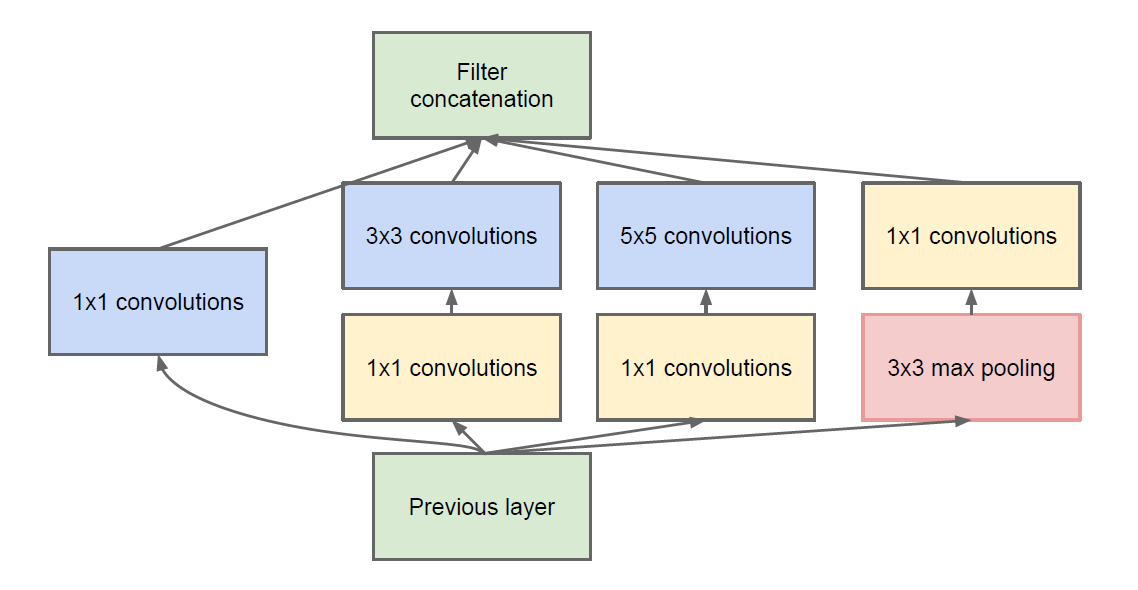

In [5]:
from IPython.display import Image
Image('Inception Module.png')

In [6]:
input_img = Input(shape=(28, 28, 1))
#BRANCH A
A= Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_A_1X1_CONV')(input_img)

#BRANCH B
B = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_B_1X1_CONV')(input_img)
B = Conv2D(64, (3,3), padding='same', activation='relu',name='BRANCH_B_3X3_CONV')(B)

#BRANCH C
C = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_C_1X1_CONV')(input_img)
C = Conv2D(64, (5,5), padding='same', activation='relu',name='BARNCH_C_5X5_CONV')(C)

D = MaxPooling2D((3,3), strides=(1,1), padding='same',name='BRANCH_D_3X3_MAXPO')(input_img)
D = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_D_1X1_CONV')(D)

# concatenation
Filter_Concatenate = keras.layers.concatenate([A, B, C, D], axis = 3)

# add dense layers
output = layers.Flatten()(Filter_Concatenate)
output = layers.Dense(32, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

In [7]:
model = Model(inputs=input_img, outputs=output)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
BRANCH_B_1X1_CONV (Conv2D)      (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
BRANCH_C_1X1_CONV (Conv2D)      (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
BRANCH_D_3X3_MAXPO (MaxPooling2 (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
BRANCH_A_1

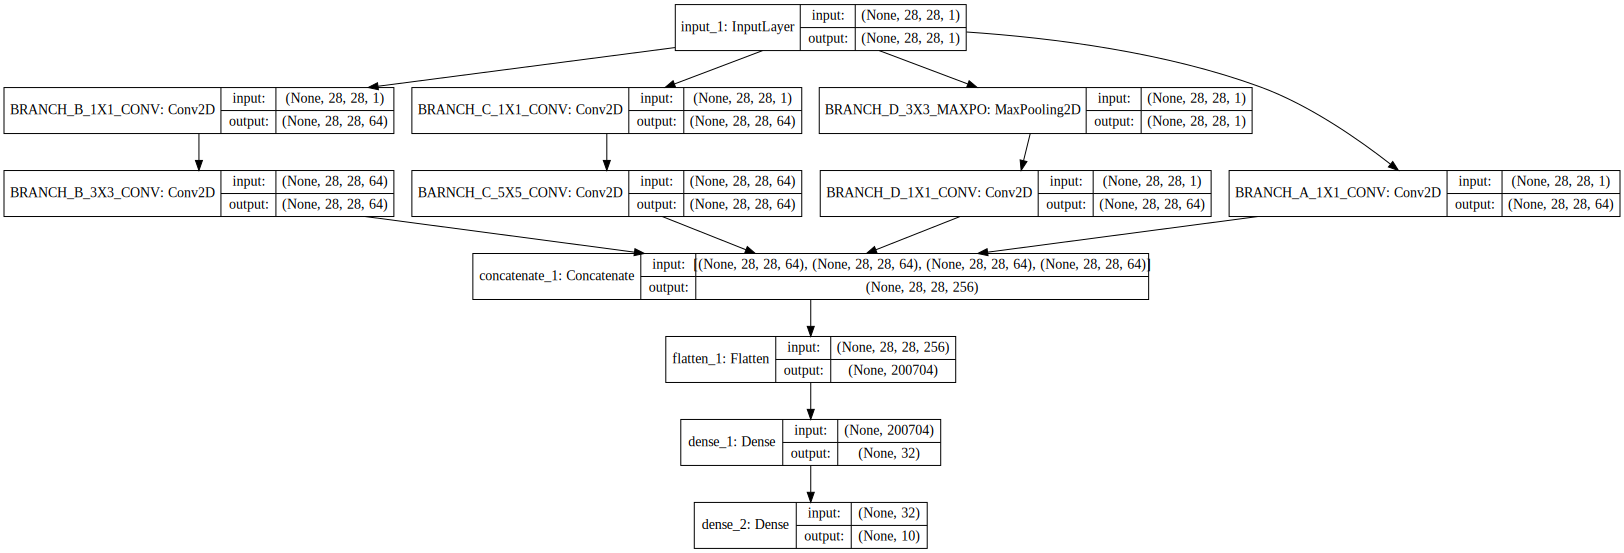

In [8]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
plot_model(model, to_file='INCEPTION.png')

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=1, batch_size=64)

Epoch 1/1
60000/60000 [==============================] - 30s 503us/step - loss: 0.1580 - acc: 0.9540


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 618us/step


In [13]:
test_acc

0.9805

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights(os.path.join(os.getcwd(), 'wazirmodel.h5'))